In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/opt/anaconda/envs/geog0111/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#Input quantities
FracSC=1    #solar constant as fraction of present day 
A=204       #thermal A
B=2.17      #thermal B
K=3.87      #transport C
a_ice=0.62  #ice albedo
t_crit=-10  #critical temp


In [3]:
#constant para. and names
SC=1370 #solar constant of present day in W/m^2
a=0.3   #albedo
zones=['80-90','70-80','60-70','50-60','40-50','30-40','20-30','10-20','0-10'] #znoal bands
zones_mean=np.array([85,75,65,55,45,35,25,15,6]) #mean lat. of each zonal band
SunWt=np.array([0.5,0.531,0.624,0.77,0.892,1.021,1.12,1.189,1.219])
cos_lat=np.cos(zones_mean*3.1415/180)


In [4]:
#initial condition
init_t=[-15,-15,-5,5,10,15,18,22,24] #initial temp
init_a=np.zeros(len(init_t)) #create an array to store initial albedo
for i in range(len(zones)):
    if init_t[i]<t_crit:
        init_a[i]=a_ice
    else:
        init_a[i]=a
R_in=SC/4*FracSC*SunWt

In [5]:
#Step 1
Tcos=init_t*cos_lat
mean_T=np.sum(Tcos)/np.sum(cos_lat)
Temp=(R_in*(1-init_a)+K*mean_T-A)/(B+K)
albedo=np.zeros(len(zones)) #create an array to store initial albedo
for i in range(len(zones)): 
    if Temp[i]<t_crit:
        albedo[i]=a_ice
    else:
        albedo[i]=a

In [6]:
#following steps
step_no=25 #stop number
for i in range(step_no):
    Tcos=Temp*cos_lat
    mean_T=np.sum(Tcos)/np.sum(cos_lat)
    Temp=(R_in*(1-init_a)+K*mean_T-A)/(B+K)
    albedo=np.zeros(len(zones)) #create an array to store initial albedo
    for i in range(len(zones)):
        if Temp[i]<t_crit:
            albedo[i]=a_ice
        else:
            albedo[i]=a

In [7]:
pd.DataFrame({'zones':zones,'Albedo':albedo,'Temp':Temp})

,zones,Albedo,Temp
0,80-90,0.62,-13.539402
1,70-80,0.62,-12.871413
2,60-70,0.30,0.455466
3,50-60,0.30,6.250747
4,40-50,0.30,11.093380
5,30-40,0.30,16.213868
6,20-30,0.30,20.143545
7,10-20,0.30,22.882411
8,0-10,0.30,24.073222


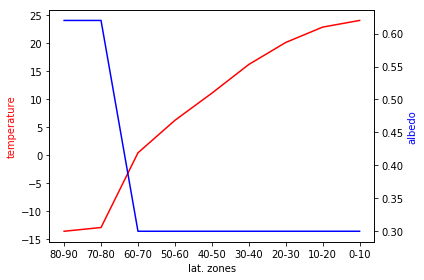

In [8]:
#plotting
fig, ax1 = plt.subplots()

ax1.set_xlabel('lat. zones')
ax1.set_ylabel('temperature',color='r')
ax1.plot(zones, Temp,'r' )
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('albedo',color='b')  
ax2.plot(zones, albedo,'b')
ax2.tick_params(axis='y')


fig.tight_layout()  

plt.show()

In [9]:
import xarray